In [1]:
#Import Python libraries
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

#R to Python interfacing
import rpy2.robjects as robj
import rpy2.robjects.packages as rpackages
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
from rpy2.robjects.numpy2ri import numpy2ri

#define random seed
iter = 1000
np.random.seed(iter)

In [2]:
def pwr_calc(model, n, coef):
    """
    Function to calculate mutual information with Jackknife approach
    
    Inputs:
        model: Model number as defined in function
        n: Number of samples
        coef: Parameter for additive noise
        
    Function returns the mutual information
    """
    #define noise with coef parameter
    if (model <= 16):
        noise = pow(10,(1/24*(coef-1)))
    
    #define models
    #model 1: linear with symmetric additive noise
    if (model == 1):
        xs = np.random.normal(size=n)
        ys = (2/3)*xs + noise * np.random.normal(size=n)
    #model 2: linear with asymmetric additive noise
    if (model == 2):
        xs = np.random.normal(size=n)
        ys = (0.05)*xs + noise * ((pow(np.random.normal(size=n),2)) - 1)
    #model 3: quadratic with additive noise
    if (model == 3):
        xs = np.random.normal(size=n)
        ys = (2/3)*xs*xs + noise * np.random.normal(size=n)

    #import jackknife approach library
    mJMI = rpackages.importr('mJMI')

    #reshape dataset to become a 2d array with 1 column
    xs = xs.reshape(-1,1)
    ys = ys.reshape(-1,1)
    
    #convert data to R matrix
    xr, xc = xs.shape
    x = robj.r.matrix(xs, nrow=xr, ncol=xc)
    yr, yc = ys.shape
    y = robj.r.matrix(ys, nrow=yr, ncol=yc)
  
    #run the jackknife algorithm and return the result in function
    jmi = mJMI.mJMICpp(x,y,1000)
    return jmi.rx2('mi')[0]

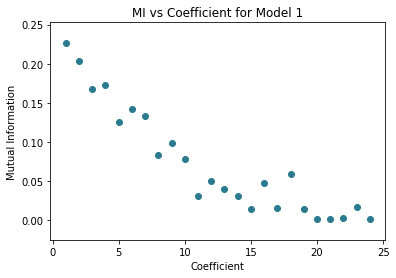

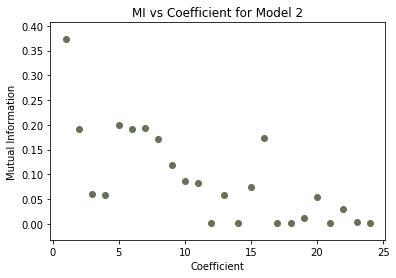

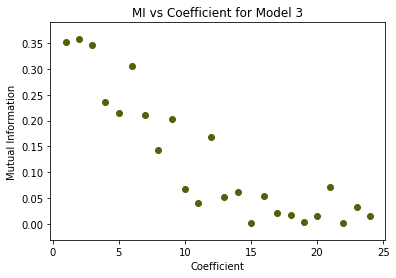

In [3]:
model_length = 3
coef_ran = 24
n = 320

for model in range(1, model_length + 1):
    MI = []
    MI_coef = []
    for coef in range(1, coef_ran + 1):
        MI.append(pwr_calc(model, n, coef))
        MI_coef.append(coef)
    
    #Plot individual graphs of MI vs Coefficient from different models
    plt.scatter(MI_coef, MI, c=np.random.rand(3,))
    plt.ylabel("Mutual Information")
    plt.xlabel("Coefficient")
    plt.title('MI vs Coefficient for Model %s' % (model))
    plt.show()